# Sorted firing rates

author: steeve.laquitaine@epfl.ch  
date: 31.10.2023  
modified: 01.02.2024

NOTE:
- adding more data improved the match between silico and vivo distributions in L1 

TODO:
- KSlabel good makes distributions closer
- remove fr_min in sorting and re-sort horvath vivo and silico

### Prerequisites

* preprocess
* sort
* posprocess in vivo and in silico recordings

## Setup

Setup `spikeinterf..` environment

In [5]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import spikeinterface as si
from random import choices

# SET PROJECT PATH

PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
from src.nodes.postpro import spikestats
from src.nodes.validation import firing_rate as fr

# EXPERIMENTS

# Horvath (vivo)
cfg_hv1, _ = get_config("vivo_horvath", "probe_1").values()
PRE_HV1 = cfg_hv1["preprocessing"]["full"]["output"]["trace_file_path"]
SORTED_HV1 = cfg_hv1["sorting"]["sorters"]["kilosort4"]["10m"]["output"]

cfg_hv2, _ = get_config("vivo_horvath", "probe_2").values()
PRE_HV2 = cfg_hv2["preprocessing"]["full"]["output"]["trace_file_path"]
SORTED_HV2 = cfg_hv2["sorting"]["sorters"]["kilosort4"]["10m"]["output"]

cfg_hv3, _ = get_config("vivo_horvath", "probe_3").values()
PRE_HV3 = cfg_hv3["preprocessing"]["full"]["output"]["trace_file_path"]
SORTED_HV3 = cfg_hv3["sorting"]["sorters"]["kilosort4"]["10m"]["output"]

# Biophy spont.
cfg_hs1, _ = get_config("silico_horvath", "concatenated/probe_1").values()
PRE_HS1 = cfg_hs1["preprocessing"]["full"]["output"]["trace_file_path"]
SORTED_HS1 = cfg_hs1["sorting"]["sorters"]["kilosort4"]["10m"]["output"]

cfg_hs2, _ = get_config("silico_horvath", "concatenated/probe_2").values()
PRE_HS2 = cfg_hs2["preprocessing"]["full"]["output"]["trace_file_path"]
SORTED_HS2 = cfg_hs2["sorting"]["sorters"]["kilosort4"]["10m"]["output"]

cfg_hs3, _ = get_config("silico_horvath", "concatenated/probe_3").values()
PRE_HS3 = cfg_hs3["preprocessing"]["full"]["output"]["trace_file_path"]
SORTED_HS3 = cfg_hs3["sorting"]["sorters"]["kilosort4"]["10m"]["output"]

# WAVEFORMS
MS_BEFORE = 3
MS_AFTER = 3

# PLOT
# set lognormal plot parameters
log_x_min = -3.0
log_x_max = 3.0
nbins = 30

# IF you don't want to use the feature, set the value to 1E100
# t_dec = 3600 # seconds until experimenter decides a cell is silent
t_dec = 1^100 # seconds until experimenter decides a cell is silent

# FIGURE
cl = dict()
cl["COLOR_NV"] = [0.6, 0.6, 0.6]
cl["COLOR_NS"] = [0.9, 0.14, 0.15]
cl["COLOR_NB"] = [0.22, 0.5, 0.72] # blue
cl["COLOR_NE"] = [1, 0.49, 0] # orange
cl["COLOR_HV"] = "k" # black
cl["COLOR_HS"] = np.array([26, 152, 80]) / 255 # green

FIG_SIZE = (4,4)
N_MAJOR_TICKS = 6
N_MINOR_TICKS = 12
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 18
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.major.width'] = 1
legend_cfg = {"frameon": False, "handletextpad": 0.1}
savefig_cfg = {"transparent":True}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-08-14 14:56:43,491 - root - utils.py - get_config - INFO - Reading experiment config.
2024-08-14 14:56:43,626 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-08-14 14:56:43,629 - root - utils.py - get_config - INFO - Reading experiment config.
2024-08-14 14:56:43,689 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-08-14 14:56:43,702 - root - utils.py - get_config - INFO - Reading experiment config.
2024-08-14 14:56:43,771 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-08-14 14:56:43,773 - root - utils.py - get_config - INFO - Reading experiment config.
2024-08-14 14:56:43,869 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-08-14 14:56:43,870 - root - utils.py - get_config - INFO - Reading experiment config.
2024-08-14 14:56:43,984 - root - utils.py - get_config - INFO - R

## Get metadata

In [29]:
# get metadata
df_hv1 = fr.get_sorted_unit_meta(SORTED_HV1)
df_hv2 = fr.get_sorted_unit_meta(SORTED_HV2)
df_hv3 = fr.get_sorted_unit_meta(SORTED_HV3)
df_hs1 = fr.get_sorted_unit_meta(SORTED_HS1)
df_hs2 = fr.get_sorted_unit_meta(SORTED_HS2)
df_hs3 = fr.get_sorted_unit_meta(SORTED_HS3)

# keep units in cortex
df_hv1 = df_hv1[np.isin(df_hv1["layer"], ["L1", "L2/3", "L4", "L5", "L6"])]
df_hv2 = df_hv2[np.isin(df_hv2["layer"], ["L1", "L2/3", "L4", "L5", "L6"])]
df_hv3 = df_hv3[np.isin(df_hv3["layer"], ["L1", "L2/3", "L4", "L5", "L6"])]
df_hs1 = df_hs1[np.isin(df_hs1["layer"], ["L1", "L2/3", "L4", "L5", "L6"])]
df_hs2 = df_hs2[np.isin(df_hs2["layer"], ["L1", "L2/3", "L4", "L5", "L6"])]
df_hs3 = df_hs3[np.isin(df_hs3["layer"], ["L1", "L2/3", "L4", "L5", "L6"])]

# unit-test: check all in cortex
assert all(
    np.isin(np.sort(df_hv1["layer"].unique()), ["L1", "L2/3", "L4", "L5", "L6"])
), "nor all in cortex"
assert all(
    np.isin(np.sort(df_hv2["layer"].unique()), ["L1", "L2/3", "L4", "L5", "L6"])
), "nor all in cortex"
assert all(
    np.isin(np.sort(df_hv3["layer"].unique()), ["L1", "L2/3", "L4", "L5", "L6"])
), "nor all in cortex"

assert all(
    np.isin(np.sort(df_hs1["layer"].unique()), ["L1", "L2/3", "L4", "L5", "L6"])
), "nor all in cortex"
assert all(
    np.isin(np.sort(df_hs2["layer"].unique()), ["L1", "L2/3", "L4", "L5", "L6"])
), "nor all in cortex"
assert all(
    np.isin(np.sort(df_hs3["layer"].unique()), ["L1", "L2/3", "L4", "L5", "L6"])
), "nor all in cortex"

### Sorted units (total)

In [31]:
print("hv1: total sorted unit:", df_hv1.shape[0])
print("hv2: total sorted unit:", df_hv2.shape[0])
print("hv3: total sorted unit:", df_hv3.shape[0])
print("hs1: total sorted unit:", df_hs1.shape[0])
print("hs2: total sorted unit:", df_hs2.shape[0])
print("hs3: total sorted unit:", df_hs3.shape[0])

hv1: total sorted unit: 127
hv2: total sorted unit: 142
hv3: total sorted unit: 89
hs1: total sorted unit: 81
hs2: total sorted unit: 117
hs3: total sorted unit: 350


### Population

#### Compute

In [3]:
# SILICO
silico_paths = [SORTED_PATH_SILICO_1, SORTED_PATH_SILICO_2, SORTED_PATH_SILICO_3]

firing_rate_all = []
layer_all = []
depth_all = []
unit_id_all = []
KSLabel_all = []
amplitude_all = []
false_positives_all = []

for ix, sorted_path in enumerate(silico_paths):
    Sorting = si.load_extractor(sorted_path)
    # record
    unit_id_all += Sorting.unit_ids.tolist()
    firing_rate_all += Sorting.get_property("firing_rates").astype(np.float32).tolist()
    layer_all += Sorting.get_property("layer").tolist()
    KSLabel_all += Sorting.get_property("KSLabel").tolist()
    amplitude_all += Sorting.get_property("Amplitude").tolist()
    false_positives_all += Sorting.get_property("false_positives").tolist()
    depth_all += len(Sorting.unit_ids) * [ix + 1]


# store in dataframe
df_silico = pd.DataFrame(
    np.array(
        [
            depth_all,
            layer_all,
            firing_rate_all,
            KSLabel_all,
            amplitude_all,
            false_positives_all,
        ]
    ).T,
    index=unit_id_all,
    columns=[
        "depth",
        "layer",
        "firing_rate",
        "kslabel",
        "amplitude",
        "false_positives",
    ],
)

df_silico["layer"][df_silico["layer"] == "L2/3"] = "L2_3"

# VIVO

vivo_paths = [SORTED_PATH_VIVO_1, SORTED_PATH_VIVO_2, SORTED_PATH_VIVO_3]

firing_rate_all = []
layer_all = []
depth_all = []
unit_id_all = []
KSLabel_all = []
amplitude_all = []

for ix, sorted_path in enumerate(vivo_paths):
    Sorting = si.load_extractor(sorted_path)
    # record
    unit_id_all += Sorting.unit_ids.tolist()
    firing_rate_all += Sorting.get_property("firing_rates").astype(np.float32).tolist()
    layer_all += Sorting.get_property("layer").tolist()
    KSLabel_all += Sorting.get_property("KSLabel").tolist()
    amplitude_all += Sorting.get_property("Amplitude").tolist()
    depth_all += len(Sorting.unit_ids) * [ix + 1]

# store in dataframe
df_vivo = pd.DataFrame(
    np.array([depth_all, layer_all, firing_rate_all, KSLabel_all, amplitude_all]).T,
    index=unit_id_all,
    columns=["depth", "layer", "firing_rate", "kslabel", "amplitude"],
)

### Apply quality filters

- evidence that false positives are low amplitude sorted spikes
- evidence that L1 silico best matches L1 vivo when selecting higher amplitude spikes
- evidence that other layers best match when selecting all spikes

/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


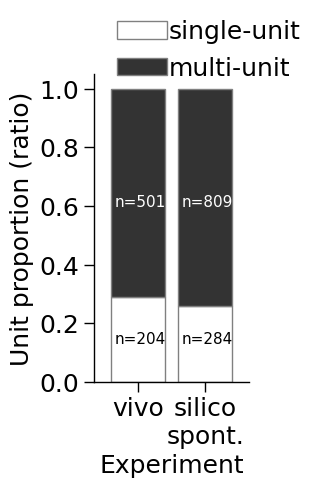

In [4]:
# plot
fig, axis = plot_single_unit_ratio(df_vivo, df_silico)

# save figures
plt.savefig(
    "figures/2_realism/6_firing_rate/pdf/horvath/horvath_single_unit_ratio.pdf",
    **savefig_cfg,
)
plt.savefig(
    "figures/2_realism/6_firing_rate/svg/horvath/horvath_single_unit_ratio.svg",
    **savefig_cfg,
)

In [5]:
# well isolated (not multi-units)
# df_vivo = df_vivo[df_vivo["kslabel"] == "good"]
# df_silico = df_silico[df_silico["kslabel"] == "good"]
print(df_vivo.shape)
print(df_silico.shape)

# # plot proportions good units
# data_df = pd.DataFrame({"cell_count": list(count_by_class.values())}, index=bias_types)

# ax = (data_df).T.plot.barh(
#     ax=axis,
#     stacked=True,
#     color=colors,
#     width=0.2,
#     edgecolor=[0.5, 0.5, 0.5],
#     linewidth=0.2,
# )

(705, 5)
(1093, 6)


#### Plot

#### Plot

/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


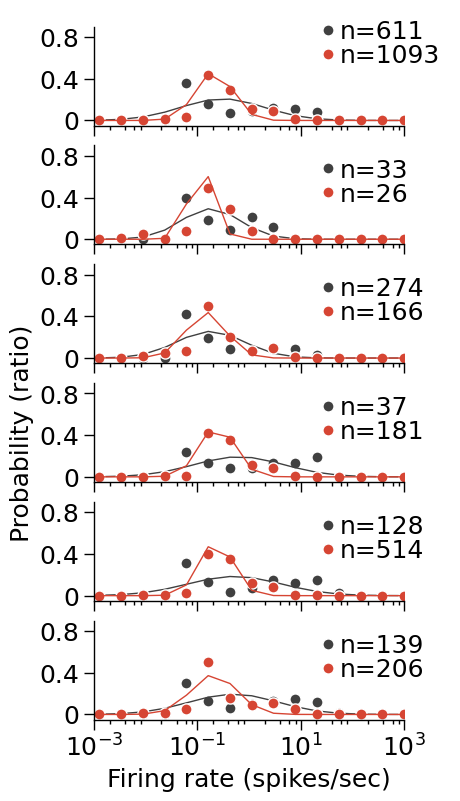

In [6]:
MARKERSIZE = 8
Y_MAX = 0.9
X_MIN = 1e-3
X_MAX = 1e3
layers = ["L1", "L2_3", "L4", "L5", "L6"]

fig, axes = plt.subplots(len(layers) + 1, 1, figsize=(4, 9))

# vivo
y = df_vivo["firing_rate"][df_vivo["layer"].isin(layers)].values.astype(np.float32)
out_vivo_entire = spikestats.plot_firing_rate_hist_vs_lognorm(
    y,
    log_x_min,
    log_x_max,
    nbins,
    t_dec,
    axes[0],
    label=f"n={len(y)}",
    color=COLOR_VIVO,
    markerfacecolor=COLOR_VIVO,
    markersize=MARKERSIZE,
    legend=False,
    lognormal=True,
)

# silico spontaneous
y = df_silico["firing_rate"][df_silico["layer"].isin(layers)].values.astype(np.float32)
out_silico_entire = spikestats.plot_firing_rate_hist_vs_lognorm(
    y,
    log_x_min,
    log_x_max,
    nbins,
    t_dec,
    axes[0],
    label=f"n={len(y)}",
    color=COLOR_SILI,
    markerfacecolor=COLOR_SILI,
    markersize=MARKERSIZE,
    legend=False,
    lognormal=True,
)
axes[0].set_xticklabels([])
axes[0].set_ylim([-0.05, Y_MAX])
axes[0].set_xlim([X_MIN, X_MAX])
axes[0].tick_params(axis="y")
axes[0].legend(
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0.6, 1.3),
    handletextpad=-0.5,
    labelspacing=0,
)

out_vivo_all = []
out_sili_all = []

for ix in range(len(layers)):
    # vivo
    y = df_vivo["firing_rate"][df_vivo["layer"] == layers[ix]].values.astype(np.float32)
    out_vivo_all.append(
        spikestats.plot_firing_rate_hist_vs_lognorm(
            y,
            log_x_min,
            log_x_max,
            nbins,
            t_dec,
            axes[ix + 1],
            label=f"n={len(y)}",
            color=COLOR_VIVO,
            markerfacecolor=COLOR_VIVO,
            markersize=MARKERSIZE,
            legend=False,
            lognormal=True,
        )
    )

    # silico
    y = df_silico["firing_rate"][df_silico["layer"] == layers[ix]].values.astype(
        np.float32
    )
    out_sili_all.append(
        spikestats.plot_firing_rate_hist_vs_lognorm(
            y,
            log_x_min,
            log_x_max,
            nbins,
            t_dec,
            axes[ix + 1],
            label=f"n={len(y)}",
            color=COLOR_SILI,
            markerfacecolor=COLOR_SILI,
            markersize=MARKERSIZE,
            legend=False,
            lognormal=True,
        )
    )
    axes[ix + 1].set_ylim([-0.05, Y_MAX])
    axes[ix + 1].set_xlim([X_MIN, X_MAX])
    axes[ix + 1].legend(
        frameon=False,
        loc="upper left",
        bbox_to_anchor=(0.6, 1.1),
        handletextpad=-0.5,
        labelspacing=0,
    )
    if ix == 2:
        axes[ix + 1].set_ylabel("Probability (ratio)")
    if ix == 4:
        axes[ix + 1].set_xlabel("Firing rate (spikes/sec)")
    else:
        axes[ix + 1].set_xticklabels([])

# save figures
plt.savefig(
    "figures/2_realism/6_firing_rate/pdf/horvath/horvath_layerwise_sorted.pdf",
    **savefig_cfg,
)
plt.savefig(
    "figures/2_realism/6_firing_rate/svg/horvath/horvath_layerwise_sorted.svg",
    **savefig_cfg,
)

In [11]:
# sanity check
assert 33 + 274 + 37 + 128 + 139 == 611
assert 26 + 166 + 181 + 514 + 206 == 1093

### Stats over mean

/tmp/ipykernel_1201/1232725984.py:51: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.boxplot(
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([va

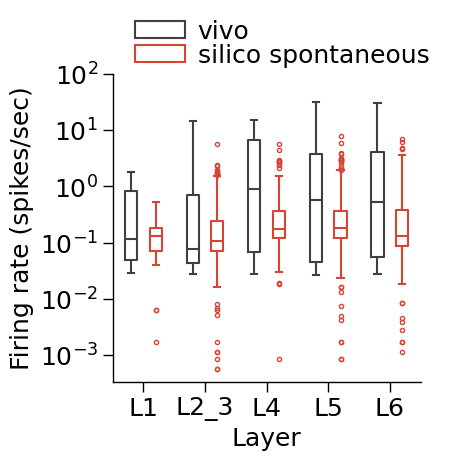

In [12]:
import copy
import seaborn as sns

# concat firing rates by layer
fr_vivo = []
fr_sili = []
layer_vivo = []
layer_sili = []
for ix, layer in enumerate(layers):
    # vivo
    fr_vivo_i = (
        df_vivo["firing_rate"][df_vivo["layer"] == layer]
        .values.astype(np.float32)
        .tolist()
    )
    fr_vivo += fr_vivo_i
    layer_vivo += [layer] * len(fr_vivo_i)

    # silico spontaneois
    fr_sili_i = (
        df_silico["firing_rate"][df_silico["layer"] == layer]
        .values.astype(np.float32)
        .tolist()
    )
    fr_sili += fr_sili_i
    layer_sili += [layer] * len(fr_sili_i)


vivo_data = pd.DataFrame(data=np.array(fr_vivo), columns=["firing rate"])
vivo_data["experiment"] = "vivo"
vivo_data["layer"] = layer_vivo
sili_data = pd.DataFrame(data=np.array(fr_sili), columns=["firing rate"])
sili_data["experiment"] = "silico spontaneous"
sili_data["layer"] = layer_sili

plot_data = pd.concat([vivo_data, sili_data], ignore_index=True)

# drop sites outside layers
mask = np.isin(plot_data["layer"], layers)
plot_data = plot_data[mask]
plot_data = plot_data.sort_values(by=["layer"])

# we plot the stats over log10(firing rate) which reflects
# bestwhat we see from the distribution plots (stats over raw data
# is not visible). Note: the log of the median is the median of the log
fig, ax = plt.subplots(1, figsize=FIG_SIZE)

plot_data2 = copy.copy(plot_data)
plot_data2["firing rate"] = np.log10(plot_data2["firing rate"])

ax = sns.boxplot(
    ax=ax,
    data=plot_data2,
    x="layer",
    y="firing rate",
    hue="experiment",
    fill=False,
    hue_order=["vivo", "silico spontaneous"],
    palette=[COLOR_VIVO, COLOR_SILI, COLOR_STIM],
    gap=0.5,
    flierprops={"marker": "."},
    linewidth=1.5,
)
ax.set_yticks(np.arange(-3, 3))
yticklabels = ["$10^{" + str(ix) + "}$" for ix in np.arange(-3, 3)]
ax.set_yticklabels(yticklabels)
ax.spines[["top", "right"]].set_visible(False)
ax.legend(
    frameon=False,
    loc="upper left",
    bbox_to_anchor=(0, 1.25),
    handletextpad=0.5,
    labelspacing=0,
)
ax.set_ylabel("Firing rate (spikes/sec)")
ax.set_xlabel("Layer")
ax.set_box_aspect(BOX_ASPECT)  # square axis

# save figures
plt.savefig(
    "figures/2_realism/6_firing_rate/pdf/horvath/horvath_sorted_fr_stats.pdf",
    bbox_inches="tight",
)
plt.savefig(
    "figures/2_realism/6_firing_rate/svg/horvath/horvath_sorted_fr_stats.svg",
    bbox_inches="tight",
)

### Stats over std

/tmp/ipykernel_1201/2204144785.py:53: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax = sns.boxplot(
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/gpfs/bbp.cscs.ch/project/proj85/laquitai/spikebias_paper/envs/npx_10m_384ch_unit_classes/lib/python3.9/site-packages/pandas/core/algorithms.py:518: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([va

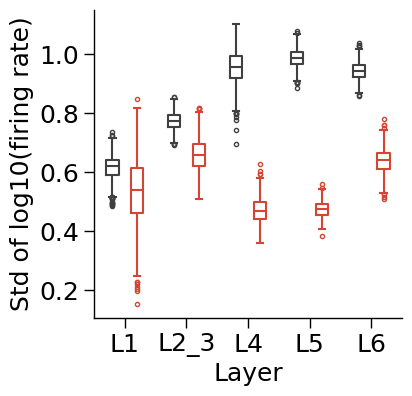

In [13]:
N_BOOT = 1000

# concat firing rates by layer
log_fr_stds_vivo = []
log_fr_stds_sili_sp = []
layer_vivo = []
layer_sili_sp = []
for ix, layer in enumerate(layers):
    # vivo
    log_fr_stds_i = bootstrap_log_fr_std(
        df_vivo["firing_rate"][df_vivo["layer"] == layer].astype(np.float32).tolist(),
        N_BOOT,
    )
    log_fr_stds_vivo += log_fr_stds_i
    layer_vivo += [layer] * len(log_fr_stds_i)

    # silico spontaneous
    log_fr_stds_sp_i = bootstrap_log_fr_std(
        df_silico["firing_rate"][df_silico["layer"] == layer]
        .astype(np.float32)
        .tolist(),
        N_BOOT,
    )
    log_fr_stds_sili_sp += log_fr_stds_sp_i
    layer_sili_sp += [layer] * len(log_fr_stds_sp_i)

# Format dataset to plot
vivo_data = pd.DataFrame(
    data=np.array(log_fr_stds_vivo), columns=["std of log10(firing rate)"]
)
vivo_data["experiment"] = "vivo"
vivo_data["layer"] = layer_vivo

sili_data_sp = pd.DataFrame(
    data=np.array(log_fr_stds_sili_sp), columns=["std of log10(firing rate)"]
)
sili_data_sp["experiment"] = "silico spontaneous"
sili_data_sp["layer"] = layer_sili_sp

plot_data = pd.concat([vivo_data, sili_data_sp], ignore_index=True)

# drop sites outside layers
mask = np.isin(plot_data["layer"], layers)
plot_data = plot_data[mask]
plot_data = plot_data.sort_values(by=["layer"])


# we plot stds stats over bootstrapped log10(firing rate) which reflects
# best what we see from the distribution plots (stats over raw data
# is not visible).
fig, ax = plt.subplots(1, figsize=FIG_SIZE)

ax = sns.boxplot(
    ax=ax,
    data=plot_data,
    x="layer",
    y="std of log10(firing rate)",
    hue="experiment",
    fill=False,
    hue_order=["vivo", "silico spontaneous"],
    palette=[COLOR_VIVO, COLOR_SILI, COLOR_STIM],
    gap=0.5,
    flierprops={"marker": "."},
    linewidth=1.5,
)

# add legend
ax.spines[["top", "right"]].set_visible(False)
# ax.legend(
#     frameon=False,
#     loc="upper left",
#     bbox_to_anchor=(0.2, 1.1),
#     handletextpad=0.5,
#     labelspacing=0,
# )
plt.legend([], [], frameon=False)
ax.set_ylabel("Std of log10(firing rate)")
ax.set_xlabel("Layer")
ax.set_box_aspect(BOX_ASPECT)  # square axis

# save figures
plt.savefig(
    "figures/2_realism/6_firing_rate/pdf/horvath/horvath_sorted_fr_std.pdf",
    bbox_inches="tight",
)
plt.savefig(
    "figures/2_realism/6_firing_rate/svg/horvath/horvath_sorted_fr_std.svg",
    bbox_inches="tight",
)